# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

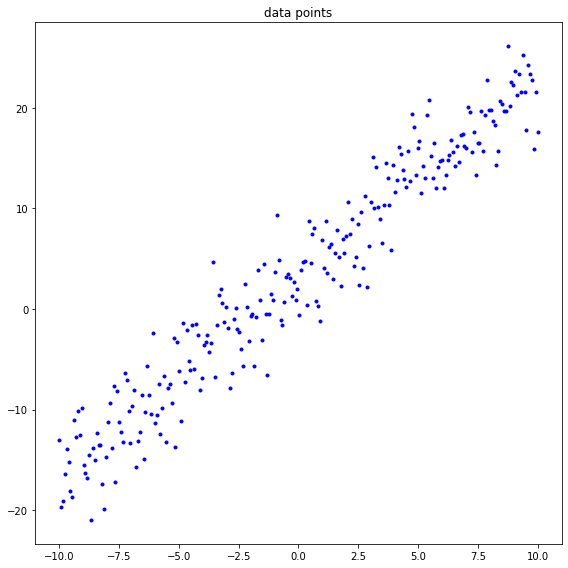

In [2]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

In [3]:
print(x.shape,y.shape)
print(x,y)

(256,) (256,)
[-10.        -9.921569  -9.843137  -9.764706  -9.686275  -9.607843
  -9.529412  -9.45098   -9.372549  -9.294118  -9.215686  -9.137255
  -9.058824  -8.980392  -8.901961  -8.823529  -8.745098  -8.666667
  -8.588235  -8.509804  -8.431373  -8.352941  -8.27451   -8.196078
  -8.117647  -8.039216  -7.960784  -7.882353  -7.803922  -7.72549
  -7.647059  -7.568627  -7.490196  -7.411765  -7.333333  -7.254902
  -7.176471  -7.098039  -7.019608  -6.941176  -6.862745  -6.784314
  -6.705882  -6.627451  -6.54902   -6.470588  -6.392157  -6.313725
  -6.235294  -6.156863  -6.078431  -6.        -5.921569  -5.843137
  -5.764706  -5.686275  -5.607843  -5.529412  -5.45098   -5.372549
  -5.294118  -5.215686  -5.137255  -5.058824  -4.980392  -4.901961
  -4.823529  -4.745098  -4.666667  -4.588235  -4.509804  -4.431373
  -4.352941  -4.27451   -4.196078  -4.117647  -4.039216  -3.960784
  -3.882353  -3.803922  -3.72549   -3.647059  -3.568627  -3.490196
  -3.411765  -3.333333  -3.254902  -3.176471  -3.

In [4]:
## compute the loss function

In [5]:
def compute_loss(x, y, theta0, theta1):

    loss=0
    i=0
    for i in range(len(x)):
        loss+=(theta0 + theta1*x[i] - y[i])**2
    
    loss/=2*len(x)  #mean
        
    return loss

## compute the gradient for each model parameter

In [6]:
def compute_gradient_theta0(x, y, theta0, theta1):

    dL=(theta0 + theta1*x - y).mean()

    return dL

In [7]:
def compute_gradient_theta1(x, y, theta0, theta1):

    dL=((theta0 + theta1*x - y)*x).mean()

    return dL

## gradient descent for each model parameter

In [8]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x, y, theta0, theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x, y, theta0, theta1)
    loss    = compute_loss(x, y, theta0, theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

2
iteration =  394, loss = 4.53588
iteration =  395, loss = 4.53585
iteration =  396, loss = 4.53581
iteration =  397, loss = 4.53577
iteration =  398, loss = 4.53574
iteration =  399, loss = 4.53570
iteration =  400, loss = 4.53567
iteration =  401, loss = 4.53564
iteration =  402, loss = 4.53561
iteration =  403, loss = 4.53557
iteration =  404, loss = 4.53554
iteration =  405, loss = 4.53551
iteration =  406, loss = 4.53548
iteration =  407, loss = 4.53545
iteration =  408, loss = 4.53543
iteration =  409, loss = 4.53540
iteration =  410, loss = 4.53537
iteration =  411, loss = 4.53534
iteration =  412, loss = 4.53532
iteration =  413, loss = 4.53529
iteration =  414, loss = 4.53527
iteration =  415, loss = 4.53524
iteration =  416, loss = 4.53522
iteration =  417, loss = 4.53519
iteration =  418, loss = 4.53517
iteration =  419, loss = 4.53515
iteration =  420, loss = 4.53512
iteration =  421, loss = 4.53510
iteration =  422, loss = 4.53508
iteration =  423, loss = 4.53506
iteratio

In [9]:
f = theta0 + theta1 * x
#f = theta0**2 + theta1**2
print(theta0)

3.231594177337574


## plot the results

In [10]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')
    
    plt.plot(x,y, 'p', color='blue')
    plt.plot(x,f, '-', color='red')
    
    plt.tight_layout()
    plt.show()

In [11]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')
    
    plt.plot(loss_iteration, '-', color='red')

    plt.tight_layout()
    plt.show()

In [12]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    
    plt.plot(theta0_iteration, '-', color='blue')
    plt.plot(theta1_iteration, '-', color='green')

    plt.tight_layout()
    plt.show()

In [13]:

X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = np.meshgrid(X0,X1)

grid_loss = compute_loss(x, y, grid_theta0, grid_theta1)

def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):

    fig = plt.figure(figsize=(8,8))
    plt.title('loss surface')
    
    ax=fig.add_subplot(111,projection='3d')
    ax.plot_surface(grid_theta0, grid_theta1, grid_loss, rstride = 2, cstride = 2)

    ax.set_xlabel('x-grid_theta0')
    ax.set_ylabel('y-grid_theta1')
    ax.set_zlabel('z-grid_loss')

    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

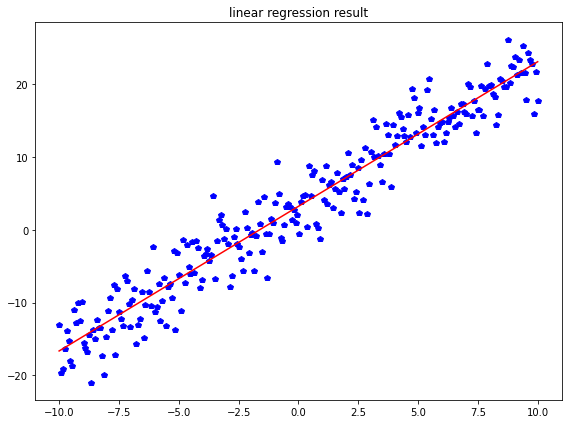

In [14]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue and $\theta_1$ in green over the gradient descent iterations

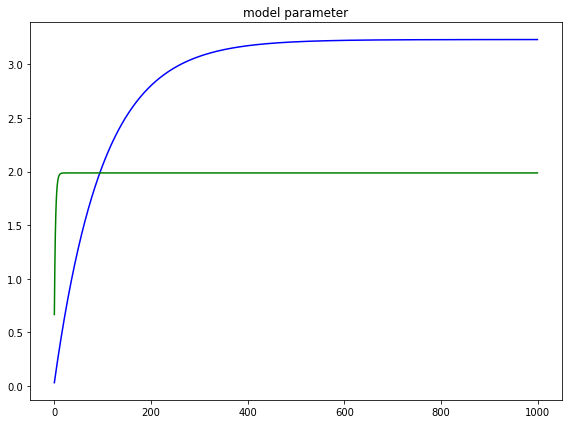

In [15]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red over the gradient descent iterations

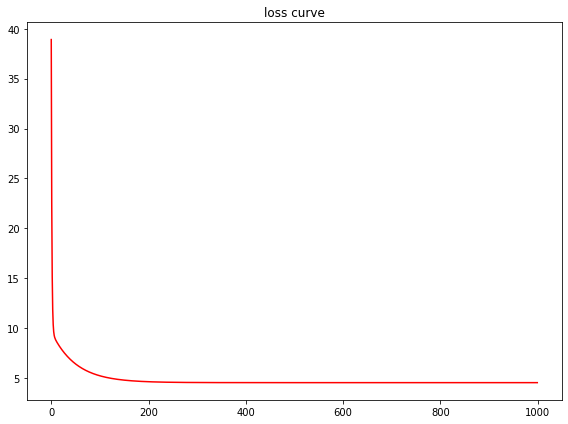

In [16]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

ipykernel_launcher:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


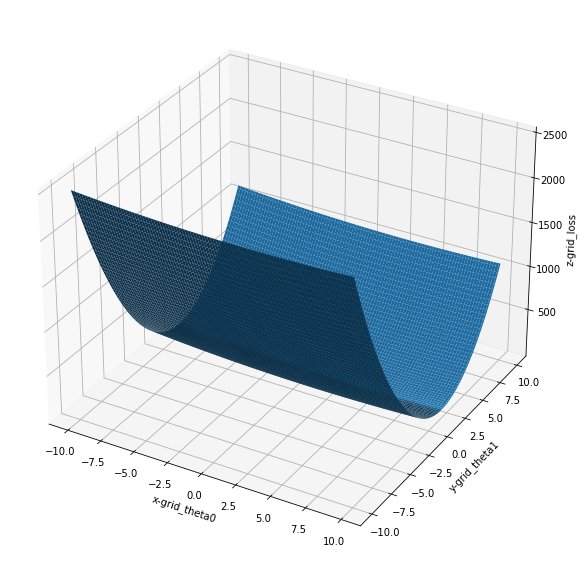

In [17]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)